In [1]:
import tensorflow as tf
import os

In [2]:
import keras as ks
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" 

Using TensorFlow backend.


In [3]:
train=pd.read_csv('C:/Users/HP-PC/Desktop/Analytics Vidya/train.csv')

In [14]:
image_url=[]
for i in range(train.shape[0]):
    img=image.load_img('C:/Users/HP-PC/Desktop/Analytics Vidya/images/'+train['image_names'][i])
    img = image.img_to_array(img)
    img = img/255
    image_url.append(img)
        

In [15]:
import numpy as np
x=np.asarray(image_url)


In [16]:
y=train['emergency_or_not']


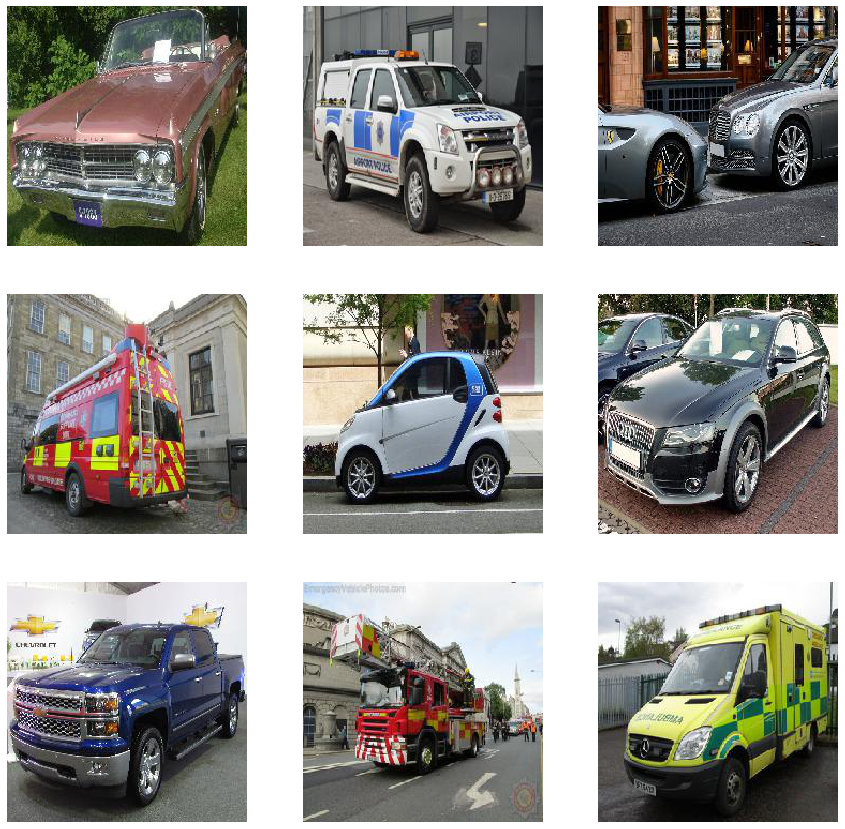

In [17]:
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(image_url[i+9])
    ax.axis('off')
    
    

In [9]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
#model
x_train[0].shape

(224, 224, 1)

In [68]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
model = VGG16(include_top=False, input_shape=(224,224, 3))
for layer in model.layers:
    layer.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)
opt=keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
datagen=ImageDataGenerator(horizontal_flip=True,rotation_range=19,rescale=1.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.fit_generator(datagen.flow(x_train,y_train), epochs = 20, verbose =1,validation_data=(x_test,y_test),callbacks=[es])



Epoch 1/20
42/42 [==============================] - ETA: 10:51 - loss: 0.7211 - accuracy: 0.437 - ETA: 9:49 - loss: 3.4059 - accuracy: 0.453 - ETA: 9:09 - loss: 2.5410 - accuracy: 0.47 - ETA: 8:44 - loss: 2.6556 - accuracy: 0.44 - ETA: 8:23 - loss: 2.4257 - accuracy: 0.47 - ETA: 8:07 - loss: 2.1321 - accuracy: 0.50 - ETA: 7:50 - loss: 1.9170 - accuracy: 0.51 - ETA: 7:34 - loss: 1.7559 - accuracy: 0.53 - ETA: 7:24 - loss: 1.6626 - accuracy: 0.53 - ETA: 7:11 - loss: 1.5530 - accuracy: 0.55 - ETA: 6:56 - loss: 1.4517 - accuracy: 0.57 - ETA: 6:41 - loss: 1.3679 - accuracy: 0.58 - ETA: 6:27 - loss: 1.3083 - accuracy: 0.59 - ETA: 6:13 - loss: 1.2484 - accuracy: 0.60 - ETA: 5:59 - loss: 1.2083 - accuracy: 0.61 - ETA: 5:27 - loss: 1.1662 - accuracy: 0.61 - ETA: 5:15 - loss: 1.1156 - accuracy: 0.62 - ETA: 5:03 - loss: 1.0655 - accuracy: 0.64 - ETA: 4:51 - loss: 1.0246 - accuracy: 0.65 - ETA: 4:39 - loss: 0.9918 - accuracy: 0.66 - ETA: 4:27 - loss: 0.9743 - accuracy: 0.66 - ETA: 4:14 - loss: 0.9